# Classification using machine learning

#### Concepts covered

* Supervised machine learning
* Classical machine learning
* Parameters/hyperparameters
* Test/train split
* Decision trees
* Overfitting
* Evaluation/metrics
* Cross-validation
* Bagging and boosting

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
plt.style.use('tableau-colorblind10')

In [2]:
# a function to visualise the classification of a model
def visualize_classifier(model, ax=None, cmap='viridis'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=20, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3, alpha=0.7, edgecolors='black' )
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## Step 0: Set up the data

<details>
<summary>Click for more details:</summary>

For this lecture and example we will be using a dataset of `blobs` that is generated automatically by `scikit-learn`. We generate a dataset of 300 samples with 4 different centres of the data. Use the code below to generate and plot the data.
    
</details>

In [3]:
# generate data with 4 clusters
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.5)

In [4]:
# analyse the data
print(type(X))
print(np.shape(X))

print(type(y))
print(np.shape(y))

<class 'numpy.ndarray'>
(300, 2)
<class 'numpy.ndarray'>
(300,)


In [5]:
# arrange the data in a pandas dataframe
df = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'y': y})
df

,x1,x2,y
0,-0.990759,3.994403,1
1,-1.661762,6.770868,3
2,1.423627,6.293366,0
3,-0.674157,7.784097,3
4,0.095477,3.384860,1
...,...,...,...
295,1.851343,2.603001,1
296,3.212953,2.132920,1
297,-0.366930,4.884141,0
298,2.796080,7.724573,3


In [6]:
# find the number of unique labels 'y '
np.unique(y)

array([0, 1, 2, 3])

Note that each row in the above table is a data-point. Each data-point has a label 'y'. \

We want to make an ML classifiaction model that correctly classifies the label y for given (x1,x2) values

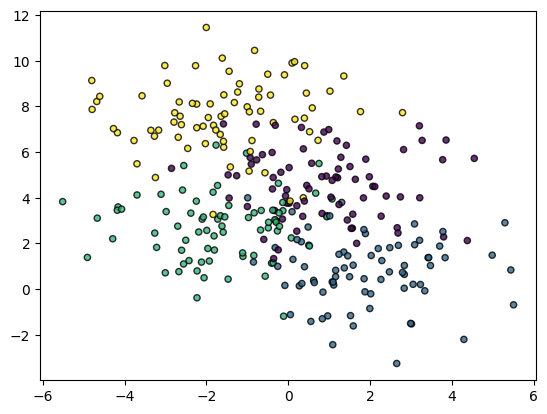

In [7]:
# plot the points
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=20, alpha=0.8, edgecolors='black')

## Step 1: Split the data for train and test sets

<details>
<summary>Click for more details:</summary>

Splitting the data into train and test sets is a crucial step in machine learning to evaluate the model's performance on unseen data.

The training set is used to train the model, i.e., to fit the parameters and learn patterns in the data. The test set is used to assess the model's generalization ability, ensuring it performs well on new, unseen data.\

Without splitting, the model may memorize the training data (overfitting) and fail to generalize to other data.
    
</details>

In [8]:
from sklearn.model_selection import train_test_split

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# check the lengths of training and testing data
print('all data points:',np.shape(X), np.shape(y))
print('training data:  ',np.shape(X_train), np.shape(y_train))
print('testing data:   ',np.shape(X_test), np.shape(y_test))

all data points: (300, 2) (300,)
training data:   (240, 2) (240,)
testing data:    (60, 2) (60,)


## Step 2: Setting up a decision tree

<details>
<summary>Click for more details:</summary>

We can import a decision tree classifier from `scikit-learn` and use this to try to classify the data into clsuters.

Go to [lecture notes]() to cover the theory of decision trees

### Hyperparameters

There are many hyperparameters that can be set for the decision tree classifier. For the purposes of this tutorial we will consider only a few of these. For a full list see [the `DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

#### `max_depth`

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain fewer than `min_samples_split` samples.

#### `min_samples_split`

The minimum number of samples required to split an internal node:

    * If int, then consider min_samples_split as the minimum number.
    * If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
    
#### `max_features`

The maximum number of features of the input data that can be used for splitting. If this is left as `None` then the `max_features` is the number of features.

#### Our model

For our model we will simply go with the default hyperparameters and see how the network performs.
    
</details>

In [10]:
# import a class for the ML model from the sklearn package
from sklearn.tree import DecisionTreeClassifier

# find out the available hyper-parameters of the imported class using the help() function
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strat

In [11]:
# create an instance of the ML class with the default hyper-parameters
decision_tree = DecisionTreeClassifier()

## Step 3: Fit the model to our training data

<details>
<summary>Click for more details:</summary>


In this instance we do not need to do much feature engineering - the data that we have are relatively simple and have only two features; the coordinates on the plane.

The model objects in `scikit-learn` have a `fit` method, which takes the feature `X` and label `y` data as inputs and fits the model. Use the code below to fit the model and then use the `visualize_classifier` helper function to look at the result.
    
</details>

In [12]:
# train the model on the data
tree = decision_tree.fit(X_train, y_train)

<ipython-input-2-ee4ec5d558fb>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


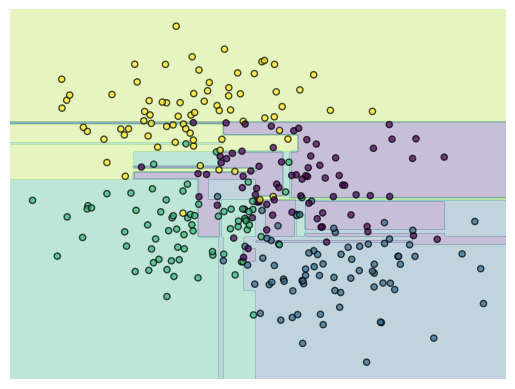

In [13]:
# use our predefined function to visualise our model's classification
visualize_classifier(tree)

Notice that in the middle there seem to be rather arbitrary classification of regions of the data. Try rerunnig the clustering for different random sub-sets of the training data.

<ipython-input-2-ee4ec5d558fb>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
<ipython-input-2-ee4ec5d558fb>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


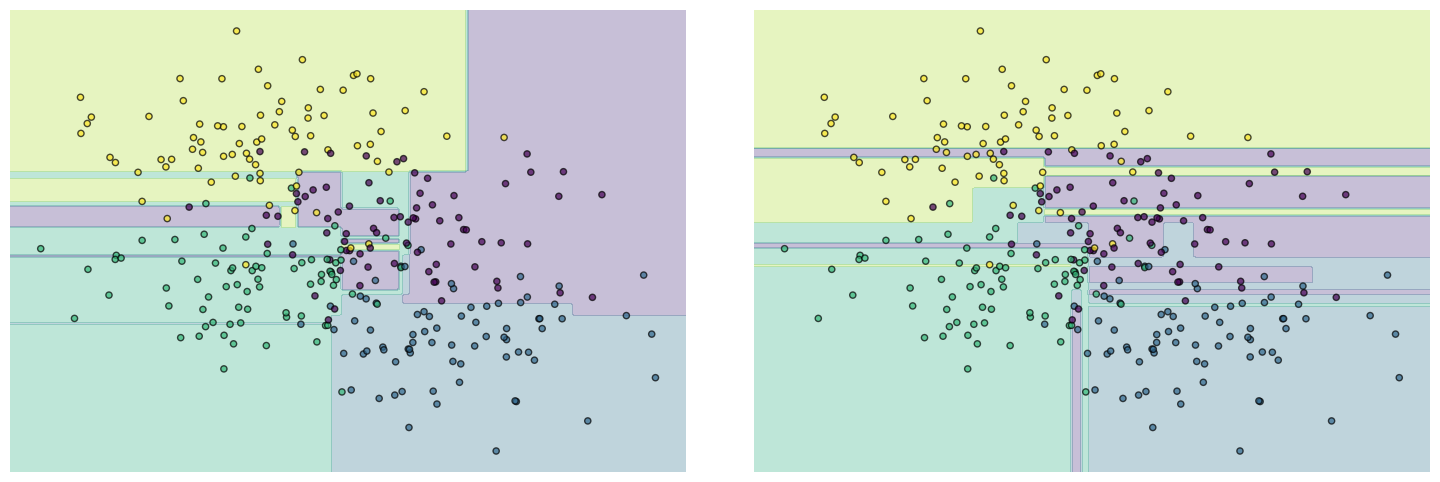

In [14]:
# create a figure and a couple of axes to visualise a two different plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# train the decision tree on 50% of the data and visualise its classification
decision_tree = tree.fit(X_train[::2], y_train[::2])
visualize_classifier(tree, ax=ax[0])

# train the decision tree on the rest 50% of the data and visualise
decision_tree = tree.fit(X_train[1::2], y_train[1::2])
visualize_classifier(tree, ax=ax[1])

You can see that the classification is consistent in some regions, but quite different in the centre of the plot. It is concerning that the details of the classification in the centre of the plot are depedent on the training data. This is a classic sign that the model is **overfitting**.

Of course, we can see visually that this overfitting is occuring, but is there a more systematic way of detecting overfitting?

To do this we first need to have an objective measure of how well the model is performing. We need a **metric**.

Go to [lecture notes]() to cover metrics for evaluation of models.

## Step 4: Evaluation

<details>
<summary>Click for more details:</summary>

We are now in a position to evaluate how the model is performing. Let's start by once again fitting the model to our dataset `(X, y)`.

Next we get the predicted values of `y` by using the `predict` method of the new model.

Finally use the `accuracy_score` metric from `scikit-learn` to get the accuracy of the model on this data
    
<summary>

In [15]:
# import the function to calculate accuracy of predictions
from sklearn.metrics import accuracy_score

help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, default=True
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Ret

In [16]:
# retrain the model on the entire data
tree = DecisionTreeClassifier().fit(X_train, y_train)

# predict the label y for given (x1, x2)
y_pred = tree.predict(X_train)

# calculate the accuracy of prediction for training
print(accuracy_score(y_train, y_pred))

1.0


That's pretty accurate!!

But wait up a moment - let's try the model on some new data - generated the same way as before, but which was not used in the training.

In [17]:
# use our trained ML model to predict the lables of test data
y_pred = tree.predict(X_test)

# calculate test accuracy of the model for the test data
print(accuracy_score(y_test, y_pred))

0.7666666666666667


That's not quite as good as before!

The model is overfitting - i.e. it is performing well on training data but not generalising beyond the training set. This often results when the model has too many *parameters* and fits too flexibly to the training data. The number of parameters in the model is a *hyper parameter* and must be specified to choose the model.

## Step 5: Hyperparameter tuning and crossvalidation

<details>
<summary>Click for more details:</summary>

We are going to use a training/test split and cross-validation to tune the hyper parameters of the model. Go to the [lecture notes]() for some more in-depth examples.

Below is some code to set up a search across the `max_depth` parameter ranging from 1 - 20. For each value of the hyperparameter, we use a 5-fold cross validation.
    
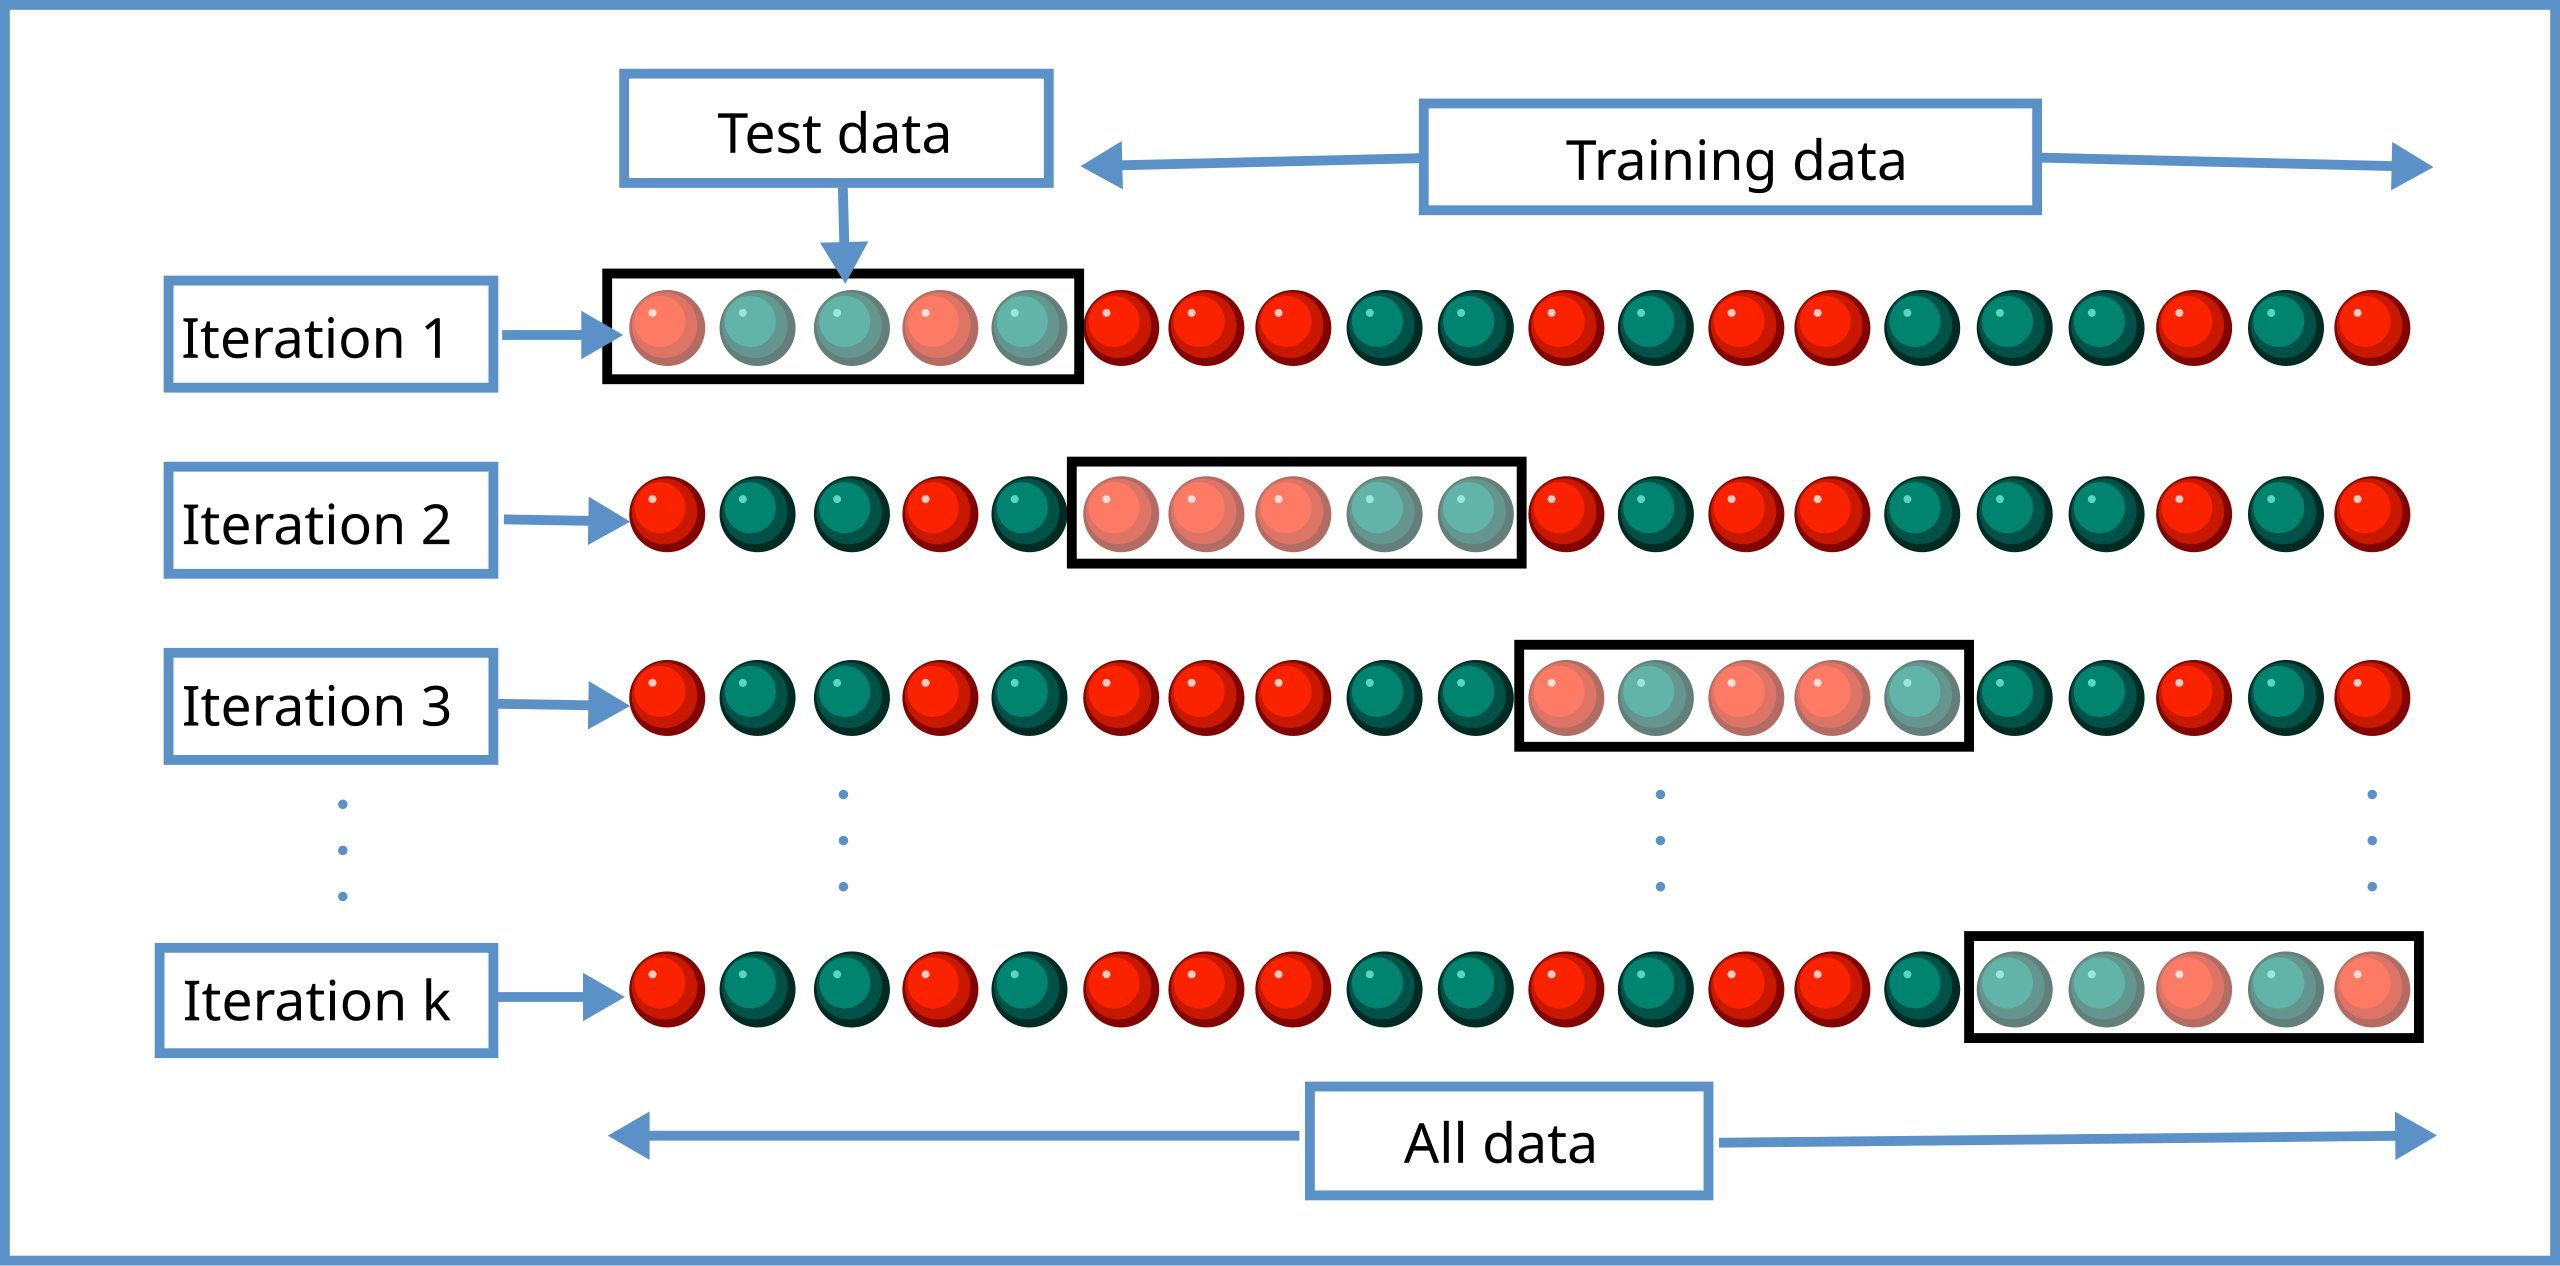
</details>


In [18]:
# import the class to perform hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# find the possible hyper parameters of your model
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [19]:
# define a dict containing the name of hyper parameter as key and their search range the value
param_grid = {'max_depth':range(1, 20, 1)}

# create an instance of the ML model
tree = DecisionTreeClassifier()

# pass the model and dist to GridSearchCV
search = GridSearchCV(tree, param_grid, cv=5)

# fit the training data to tune the desired hyper paramters
gs = search.fit(X_train, y_train)

In [20]:
# obtain the best hyperparameter from the cross validation
gs.best_params_

{'max_depth': 3}

Text(0, 0.5, 'Val Accuracy')

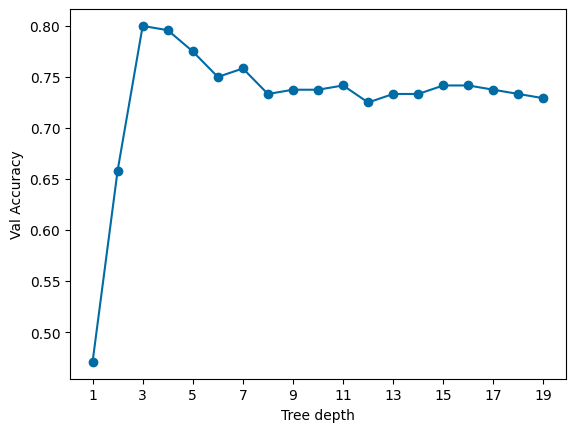

In [21]:
# plot the variation of accuracy with tree depth as found during hyper parameter tuning
plt.plot(range(1, 20, 1), search.cv_results_['mean_test_score'], '-o')
plt.xticks(range(1, 20, 2))
plt.xlabel('Tree depth')
plt.ylabel('Val Accuracy')

You should see that the cross-validation score has a maximum at somewhere around 3 for the `max_depth`.
We take the best performing hyperparameter and retrain the model on the full dataset, we than apply this model to the new, unseen data and see how it performs.

In [22]:
# create the Tree with the optimum max_depth
depth = gs.best_params_['max_depth']
tree = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)

# calculate the accuracy for the test set
y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.85


## Summary of sklearn syntax:

**Splitting data into train and test set:**
<details>
<summary>Syntax:</summary>

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
```
</details>


**Training a model:**
<details>
<summary>Syntax:</summary>
    
```python
from sklearn.'module name' import ReqModel
model = ReqModel()
model.fit(X_train, y_train)
```
</details>



**Testing the model:**
<details>
<summary>Syntax:</summary>

```python
y_pred = model.predict(y_test)
from sklearn.metrics import req_metric
performance = req_metric(y_test, y_pred)
```
</details>


**Performing hyper parameter optimization with k fold crossvalidation:**
<details>
<summary>Syntax:</summary>
    
```python
from sklearn.model_selection import GridSearchCV

# create an instance of the ML model for hyper parameter tuning
model = ReqModel()

# create a dictonary of all hyper parameters to be tuned with a range of values for each hyper paramater
params_dict = {'hyperparameter1': [1,2,3, . . .], 'hyperparameter2': [1,2,3, . . .], . . .}

search = GridSearchCV(model, params_dict)

# find best hyper parameters
gs = search.fit(X_train, y_train)

# find the best parameters
gs.best_params_
```
</details>

## Step 6: Bagging and boosting

We can improve the performance of decision trees in two simple ways. Bagging and boosting. Bagging involves training an ensemble of trees on subsets of the training set. This way we can take the average result of the ensemble rather than any given individual result.

Boosting involves training a new decision tree based on the errors of the first tree. See the [lecture notes]() for a more in depth discussion of bagging and boosting.

<ipython-input-2-ee4ec5d558fb>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


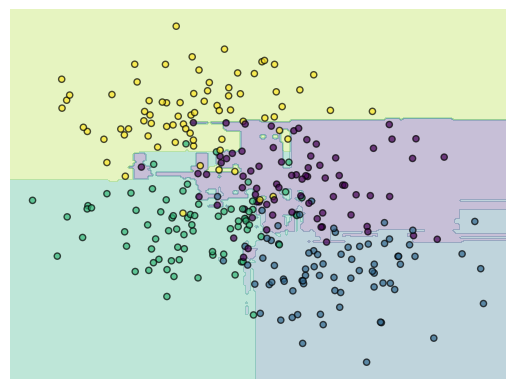

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train the RandomForestClassifier with hyper parameters n_estimators=300, random_state=0
forest = RandomForestClassifier(n_estimators=300, random_state=0)
model = forest.fit(X_train, y_train)

# Visualise the classification using the visualize_classifier() function
visualize_classifier(model)


In [24]:
# find the test accuracy score of the RandomForestClassifier'
y_pred = forest.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.8


<details>
<summary>Solution:</summary>
    
```python
# Train the RandomForestClassifier with hyper parameters n_estimators=300, random_state=0
forest = RandomForestClassifier(n_estimators=300, random_state=0)
model = forest.fit(X_train, y_train)

# Visualise the classification using the visualize_classifier() function
visualize_classifier(model)
    
# find the test accuracy score of the RandomForestClassifier
y_pred = forest.predict(X_test)
print(accuracy_score(y_test, y_pred))
```
</details>

## Homework

Try to do hyperparameter tuning on the boosted decision tree to see if you can improve this result.

In [ ]:
# define a dict containing the name of hyper parameter as key and their search range the value
param_grid = {'max_depth':range(1, 20, 1)}

# create an instance of the ML model
tree = DecisionTreeClassifier()

# pass the model and dist to GridSearchCV
search = GridSearchCV(tree, param_grid, cv=5)

# fit the training data to tune the desired hyper paramters
gs = search.fit(X_train, y_train)

In [25]:
# prompt:  do hyperparameter tuning on the boosted decision tree to see if you can improve this result.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 1],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
}

# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Train a new model with the best hyperparameters
best_gb_classifier = GradientBoostingClassifier(**grid_search.best_params_)
best_gb_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with best hyperparameters: {accuracy}")


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Test Accuracy with best hyperparameters: 0.85
